# Install Libraries and Datasets

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

# Load the latest version
fake_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "clmentbisaillon/fake-and-real-news-dataset",
  "Fake.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

true_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "clmentbisaillon/fake-and-real-news-dataset",
  "True.csv",
  # Provide any additional arguments like
)

print(true_df[:5])
print(fake_df[:5])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-1-ba56a2a96a83>:17: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  fake_df = kagglehub.load_dataset(
<ipython-input-1-ba56a2a96a83>:27: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  true_df = kagglehub.load_dataset(


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

# Preprocessing

## Randomize dataset

In [ ]:
true_df = true_df.sample(frac=1).reset_index(drop=True)
fake_df = fake_df.sample(frac=1).reset_index(drop=True)

print(len(fake_df))
print(len(true_df))

23481
21417


## Shorten dataset in case things take too long (optional)

In [ ]:
fake_df = fake_df[:1000]
true_df = true_df[:1000]

print(len(fake_df))
print(len(true_df))

1000
1000


## Convert to lowercase and remove URLs, whitespace, and digits

In [ ]:
# preprocessing

# lowercase
true_df = true_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
fake_df = fake_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Define a regex pattern to match URLs
url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    return url_pattern.sub('', text)

# Apply the function to the 'text' column and create a new column 'clean_text'
fake_df['title'] = fake_df['title'].apply(remove_urls)
fake_df['text'] = fake_df['text'].apply(remove_urls)
fake_df['subject'] = fake_df['subject'].apply(remove_urls)

true_df['title'] = true_df['title'].apply(remove_urls)
true_df['text'] = true_df['text'].apply(remove_urls)
true_df['subject'] = true_df['subject'].apply(remove_urls)

# remove whitespace
true_df = true_df.replace(to_replace=r'[^\w\s]', value='', regex=True)
fake_df = fake_df.replace(to_replace=r'[^\w\s]', value='', regex=True)

# remove digits
true_df = true_df.replace(to_replace=r'\d', value='', regex=True)
fake_df = fake_df.replace(to_replace=r'\d', value='', regex=True)


<ipython-input-4-12dd130c3604>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  true_df = true_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
<ipython-input-4-12dd130c3604>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fake_df = fake_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


## Tokenize

In [ ]:
# tokenize

fake_df['title'] = fake_df['title'].apply(word_tokenize)
fake_df['text'] = fake_df['text'].apply(word_tokenize)
fake_df['subject'] = fake_df['subject'].apply(word_tokenize)

true_df['title'] = true_df['title'].apply(word_tokenize)
true_df['text'] = true_df['text'].apply(word_tokenize)
true_df['subject'] = true_df['subject'].apply(word_tokenize)

## Remove stop words

In [ ]:
# remove stop words

stop_words = set(stopwords.words('english'))

fake_df['title'] = fake_df['title'].apply(lambda x: [word for word in x if word not in stop_words])
fake_df['text'] = fake_df['text'].apply(lambda x: [word for word in x if word not in stop_words])
fake_df['subject'] = fake_df['subject'].apply(lambda x: [word for word in x if word not in stop_words])

true_df['title'] = true_df['title'].apply(lambda x: [word for word in x if word not in stop_words])
true_df['text'] = true_df['text'].apply(lambda x: [word for word in x if word not in stop_words])
true_df['subject'] = true_df['subject'].apply(lambda x: [word for word in x if word not in stop_words])

## Lemmatization

In [ ]:
# lemmatization

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
fake_df['lemmatized_title'] = fake_df['title'].apply(lemmatize_tokens)
fake_df['lemmatized_text'] = fake_df['text'].apply(lemmatize_tokens)
fake_df['lemmatized_subject'] = fake_df['subject'].apply(lemmatize_tokens)

true_df['lemmatized_title'] = true_df['title'].apply(lemmatize_tokens)
true_df['lemmatized_text'] = true_df['text'].apply(lemmatize_tokens)
true_df['lemmatized_subject'] = true_df['subject'].apply(lemmatize_tokens)

# Additional Preprocessing

In this section, we'll do the following


1.   Keep the Title and Text columns and drop the rest
2.   Appending the title to the start of the text column and dropping the Title column
3.   Add a column named "label", indicating with a 1 that the article is true and a 0 indicating that the article is false
4.   Combining the true and fake datasets
5.   Combining the strings using spaces so that they can be used for the TF-IDF vectorizer (more on that later)



## Dropping Columns

In [ ]:
print(true_df.columns)

for column in true_df.columns:
  if column != 'lemmatized_title' and column != 'lemmatized_text':
    true_df = true_df.drop(column, axis=1)

for column in fake_df.columns:
  if column != 'lemmatized_title' and column != 'lemmatized_text':
    fake_df = fake_df.drop(column, axis=1)

Index(['title', 'text', 'subject', 'date', 'lemmatized_title',
       'lemmatized_text', 'lemmatized_subject'],
      dtype='object')


## Appending Title to Text

In [ ]:
print(true_df.columns)

for i in range(len(true_df)):
  true_df['lemmatized_text'][i] = true_df['lemmatized_title'][i] + true_df['lemmatized_text'][i]
true_df = true_df.drop(columns=['lemmatized_title'])

for i in range(len(fake_df)):
  fake_df['lemmatized_text'][i] = fake_df['lemmatized_title'][i] + fake_df['lemmatized_text'][i]
fake_df = fake_df.drop(columns=['lemmatized_title'])

Index(['lemmatized_title', 'lemmatized_text'], dtype='object')


Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fake_df['lemmatized_text'][i] = fake_df['lemmatized_title'][i] + fake_df['lemmatized_text'][i]
<ipython-input-9-2a83bad7468f>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[ro

## Adding Labels

In [ ]:
true_df['label'] = 1
fake_df['label'] = 0

## Combining Datasets

In [ ]:
full_df = pd.concat([true_df, fake_df], ignore_index=True)
full_df = full_df.sample(frac=1).reset_index(drop=True)

print(full_df[:10])

                                     lemmatized_text  label
0  [dnc, chair, asks, democrat, member, congress,...      0
1  [nc, goprun, board, election, smack, pat, mccr...      0
2  [trump, double, monthly, campaign, fundraise, ...      1
3  [ted, cruz, troll, master, campaign, troll, ve...      0
4  [israel, name, new, train, station, near, west...      0
5  [opposition, leader, say, brexit, must, use, t...      1
6  [beijing, police, detains, teacher, related, a...      1
7  [tillerson, offend, claim, state, department, ...      1
8  [prominent, australian, opposition, lawmaker, ...      1
9  [taiwan, appoints, new, premier, drive, reform...      1


## Combining Text

In [ ]:
# renaming columns for clarity
full_df = full_df.rename(columns={'lemmatized_text': 'text_tokens'})
full_df = full_df.rename(columns={'label': 'label'})
full_df['text_string'] = full_df['text_tokens'].apply(lambda x: ' '.join(x))

# The Model

To construct, train, and test the model, lets do the following:


1.   Set the text strings as features ("X") and the label as "y"
2.   Split the data into an 80-20 train-test split (since we're only fitting the model once we don't need to use the validation set)
3.   Extract information from X using TF-IDF using the TF-IDF Vectorizer
4.   Fit the train, validation, and test sets on the vectorizer
5.   Train a Logistic Regression model to predict the label using the X features fitted on the TF-IDF Vectorizer
6.   Evaluate the model using the test set



## Step 0: Adding Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 1

In [ ]:
X = full_df['text_string']
y = full_df['label']

## Step 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Steps 3 and 4

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3200, ngram_range=(1,2))

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Step 5

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

## Step 6

In [ ]:
y_test_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9575
Precision: 0.9554455445544554
Recall: 0.9601990049751243
F1 Score: 0.9578163771712159



Confusion Matrix (Test Set):
[[190   9]
 [  8 193]]


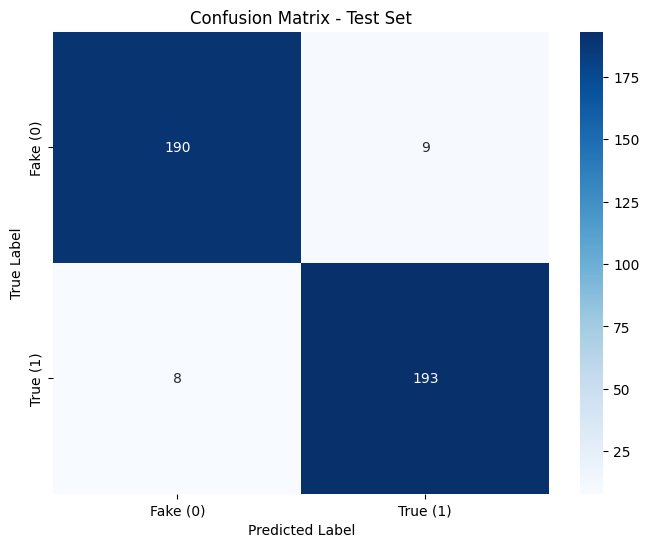

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake (0)', 'True (1)'], yticklabels=['Fake (0)', 'True (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Demo Day

In [ ]:
# prompt: Try the model out on a sample article

new_article = "Responsible AI Student Organization caught embezzling funds with burritos. The burritos they chose will shock you"
real_article = "House Republicans include a 10-year ban on US states regulating AI in 'big, beautiful' bill."
# Preprocess the new article using the same steps as the training data

def preprocess(text):
  text = new_article.lower()
  text = remove_urls(text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d', '', text)
  text_tokens = word_tokenize(text)
  text_tokens = [word for word in text_tokens if word not in stop_words]
  text_lemmas = lemmatize_tokens(text_tokens)
  text_string = ' '.join(text_lemmas)
  # Vectorize the new article using the fitted TF-IDF vectorizer
  text_tfidf = tfidf_vectorizer.transform([text_string])
  return text_tfidf

real_info = preprocess(real_article)
new_info = preprocess(new_article)

# Predict the label of the new article
predicted_label = model.predict(new_info)
# Print the predicted label
if predicted_label[0] == 1:
  print("The article is predicted to be True.")
else:
  print("The article is predicted to be Fake.")

label_two = model.predict(real_info)
if label_two[0] == 1:
  print("The article is predicted to be True.")
else:
  print("The article is predicted to be Fake.")

The article is predicted to be Fake.
The article is predicted to be Fake.
